**Problem Statement** - To create a CNN model to accurately detect images of melanoma disease. The dataset contains images from 8 other classes in addition to melanoma.

**Importing the necessary Libraries**

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Data Reading/Data Understanding**

In [ ]:
# Defining the path for train and test images
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Data Reading/Data Understanding**

In [ ]:
#reading train and test sets from the mounted google drive
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [ ]:
#checking the no. of images in train and test set
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


**Dataset Creation**

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
#reading image dataset from the directory and creating train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
#creating validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
#storing classsification label names
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Dataset Visualization**



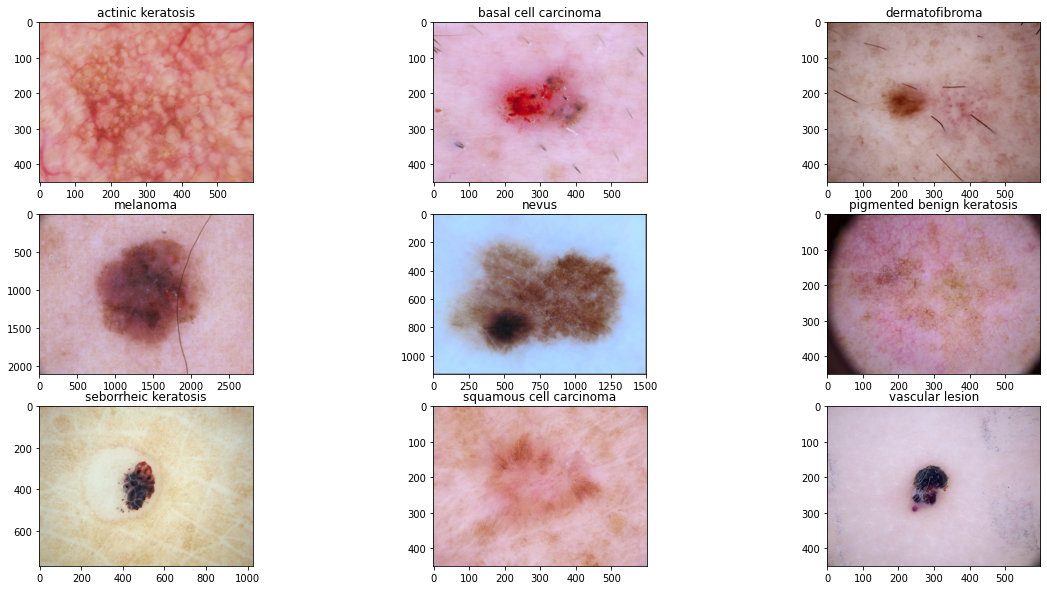

In [ ]:
#visualize one instance of all the nine classes present in the dataset 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for img in range(9): 
  plt.subplot(3, 3, img + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[img]+'/*.jpg'))[1]))
  plt.title(class_names[img])
  plt.imshow(image)

In [ ]:
#for faster loading
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Model Building & training**

In [ ]:
### CNN Model architecture with a sequence of 2 convolution layers of (3,3) kernel size filters followed by a max pooling layer of (2,2) kernel size filter.
### The above sequence is repeated thrice before flattening it out and adding a drop out function before calling the softmax function for activation.

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)) #have rescaled the image pixels to (0,1) in this step
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 3)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.25)) #to remove unnecessary neuron connections

model.add(Dense(num_classes, activation = "softmax"))

In [ ]:
#Defining appropriate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Checking model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 64)        36928     
                                                        

In [ ]:
#Training the model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 317s 1s/step - loss: 2.0724 - accuracy: 0.1892 - val_loss: 2.0123 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 5s 95ms/step - loss: 1.9563 - accuracy: 0.2550 - val_loss: 1.8989 - val_accuracy: 0.2908
Epoch 3/20
56/56 [==============================] - 5s 93ms/step - loss: 1.7560 - accuracy: 0.3527 - val_loss: 1.6291 - val_accuracy: 0.3691
Epoch 4/20
56/56 [==============================] - 5s 96ms/step - loss: 1.6513 - accuracy: 0.3973 - val_loss: 1.6168 - val_accuracy: 0.4273
Epoch 5/20
56/56 [==============================] - 5s 97ms/step - loss: 1.5484 - accuracy: 0.4414 - val_loss: 1.6118 - val_accuracy: 0.4251
Epoch 6/20
56/56 [==============================] - 5s 95ms/step - loss: 1.4830 - accuracy: 0.4715 - val_loss: 1.5455 - val_accuracy: 0.4452
Epoch 7/20
56/56 [==============================] - 5s 94ms/step - loss: 1.3436 - accuracy: 0.5173 - val_loss: 1.5284 - val_accuracy: 0.4631
Epoch 8/20
56/56 [======

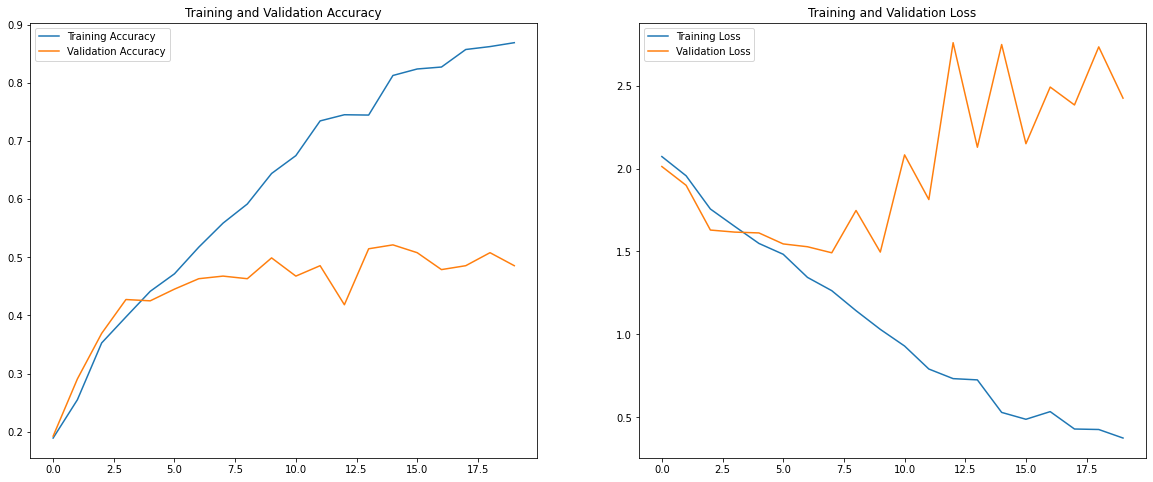

In [ ]:
#plotting a graph to compare training and validation "Accuracy" and "Loss Stats"
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

**Training Result Findings**



1.   The model is an **overfit model** with Training Set accuracy of 86% while validation set accuracy is only 48%
2.   Around 5th Epoch we see the model start to increase validation loss while decreasing the loss on training set



**Data augmentation**

In [ ]:
#To resolve overfitting we are augmenting the data with Flip, Rotation and Zoom
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')])

In [ ]:
### Passing the new augmented data to our old CNN architecture 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
model = Sequential([data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)) #have rescaled the image pixels to (0,1) in this step
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 3)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.25))

model.add(Dense(num_classes, activation = "softmax"))

In [ ]:
#Defining appropriate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 98ms/step - loss: 2.0589 - accuracy: 0.1992 - val_loss: 2.0206 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 5s 95ms/step - loss: 2.0231 - accuracy: 0.2076 - val_loss: 2.0068 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 6s 99ms/step - loss: 2.0089 - accuracy: 0.2416 - val_loss: 1.9629 - val_accuracy: 0.2975
Epoch 4/20
56/56 [==============================] - 5s 96ms/step - loss: 1.9828 - accuracy: 0.2667 - val_loss: 1.8958 - val_accuracy: 0.3423
Epoch 5/20
56/56 [==============================] - 5s 95ms/step - loss: 1.8613 - accuracy: 0.3304 - val_loss: 1.7521 - val_accuracy: 0.3624
Epoch 6/20
56/56 [==============================] - 5s 95ms/step - loss: 1.7817 - accuracy: 0.3532 - val_loss: 1.6195 - val_accuracy: 0.4004
Epoch 7/20
56/56 [==============================] - 5s 96ms/step - loss: 1.5979 - accuracy: 0.4208 - val_loss: 1.7375 - val_accuracy: 0.4206
Epoch 8/20
56

**Model Results and Evaluation**



1. The Training Set's accuracy has reduced to 52% - **Solving the overfit issue** that we had encountered earlier  
2. While the model with augmented data resolved the issue of overfitting, it doesn't give a good overall performance with accuracy result of 52% on Training Set and 48% on Training Set



**Class Distribution Analysis**

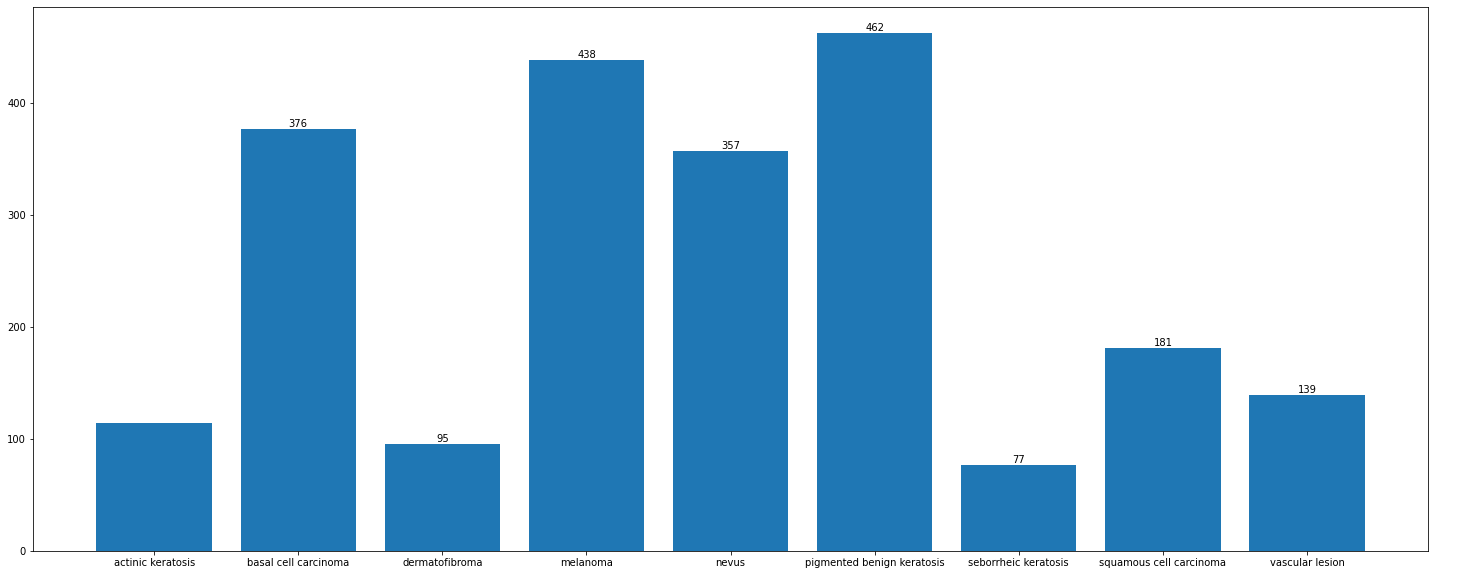

In [ ]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

n = [1,2,3,4,5,6,7,8,9]
for i in range(len(count)):
    plt.annotate(str(count[i]), xy=(n[i-1],count[i]), ha='center', va='bottom')

plt.show()

**Current Training Set Distribution Analysis:**

1. Which class has the least number of samples?
 - **Seborrheic Keratosis** has lowest sample size with 77 samples.

2. Which classes dominate the data in terms of the proportionate number of samples?
 - **Pigmented benign keratosis** dominates the dataset with 462 data.

**Handling Class Imbalance**

In [ ]:
#Using Augmnetor library to handle the class imbalance
#First installing augmentor
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Adding 500 samples per class to ensure we have ample sample size for all 9 classes
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F879A07F510>: 100%|██████████| 500/500 [00:50<00:00,  9.98 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8835429450>: 100%|██████████| 500/500 [00:59<00:00,  8.44 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8831A2EF50>: 100%|██████████| 500/500 [00:50<00:00,  9.88 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8831973990>: 100%|██████████| 500/500 [00:39<00:00, 12.77 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8831A53E90>: 100%|██████████| 500/500 [00:52<00:00,  9.47 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F879C390F10>: 100%|██████████| 500/500 [00:41<00:00, 12.09 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F88300FBD90>: 100%|██████████| 500/500 [00:41<00:00, 12.08 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F879C4FB910>: 100%|██████████| 500/500 [00:52<00:00,  9.55 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F882EEFF1D0>: 100%|██████████| 500/500 [00:37<00:00, 13.41 Samples/s]


In [ ]:
#reading augmented data from my google drive where I have stored the new 4500 images in addition to old trainng dataset
data_dir_train_augment = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment_augmented")
image_count_train1 = len(list(data_dir_train_augment.glob('*/*.jpg')))
print(image_count_train1)

6739


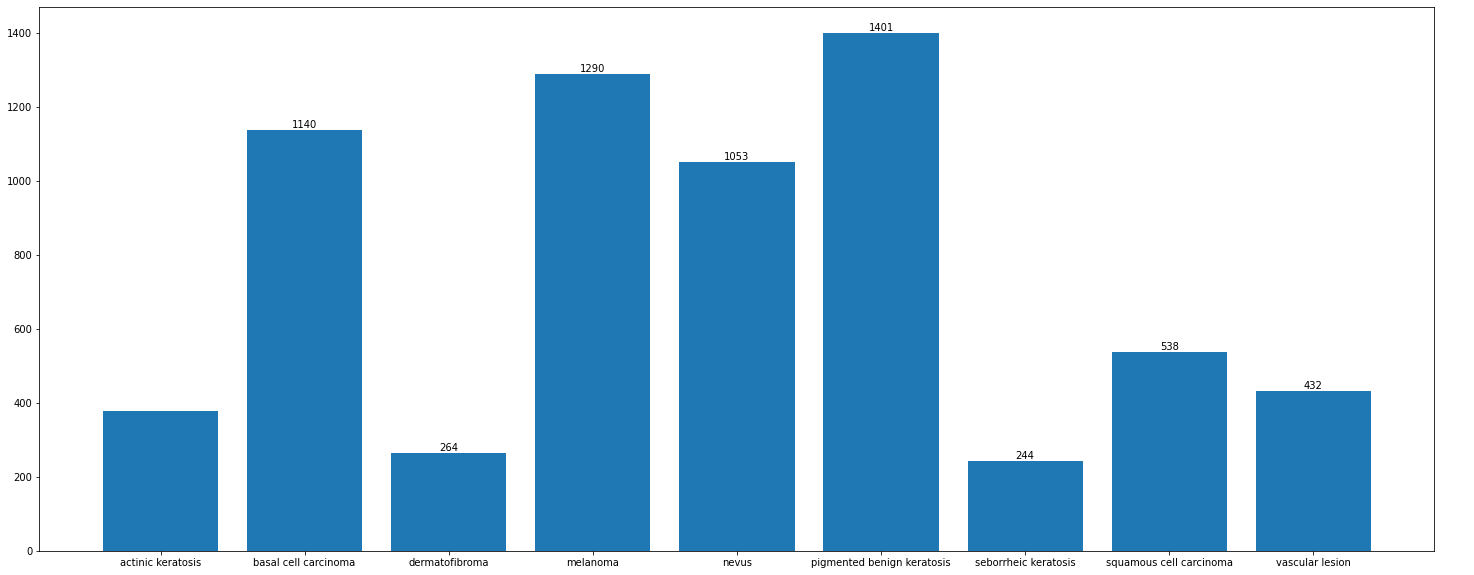

In [ ]:
#the samples have increased for all classes
count=[]
for i in class_names:
    count.append(len(list(data_dir_train_augment.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

n = [1,2,3,4,5,6,7,8,9]
for i in range(len(count)):
    plt.annotate(str(count[i]), xy=(n[i-1],count[i]), ha='center', va='bottom')

plt.show()

**Model Building and Training on New Dataset (with more samples from all classes)**

In [ ]:
#reading image dataset from the directory and creating train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train_augment,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [ ]:
#creating validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train_augment,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:
#storing classsification label names
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
### Passing the new dataset to our CNN architecture
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)) #have rescaled the image pixels to (0,1) in this step
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 3)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.25))

model.add(Dense(num_classes, activation = "softmax"))

In [ ]:
#compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#checking model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 90, 90, 64)        36928     
                                                      

In [ ]:
#Running the model with 30 epochs
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 704s 4s/step - loss: 1.9265 - accuracy: 0.2619 - val_loss: 1.6532 - val_accuracy: 0.4083
Epoch 2/30
169/169 [==============================] - 36s 207ms/step - loss: 1.5710 - accuracy: 0.4329 - val_loss: 1.5006 - val_accuracy: 0.4751
Epoch 3/30
169/169 [==============================] - 34s 196ms/step - loss: 1.4272 - accuracy: 0.5024 - val_loss: 1.3049 - val_accuracy: 0.5523
Epoch 4/30
169/169 [==============================] - 34s 195ms/step - loss: 1.3174 - accuracy: 0.5380 - val_loss: 1.3111 - val_accuracy: 0.5464
Epoch 5/30
169/169 [==============================] - 34s 195ms/step - loss: 1.2278 - accuracy: 0.5688 - val_loss: 1.2358 - val_accuracy: 0.5612
Epoch 6/30
169/169 [==============================] - 34s 196ms/step - loss: 1.1278 - accuracy: 0.6059 - val_loss: 1.1538 - val_accuracy: 0.5947
Epoch 7/30
169/169 [==============================] - 34s 195ms/step - loss: 1.0465 - accuracy: 0.6259 - val_loss: 1.0817 - val_accuracy: 0.621

**Model Results and Evaluation**

1. The model has succumbed to **overfitting** with Training Set accuracy of 95% and validation set accuracy of 75%.

To Remove overfitting, we will experiment with hyperparameters:


*   Adding and removing dropouts in convolutional layers
*   Batch Normalization (BN)
*   L2 regularisation
*   Increasing the number of convolution layers
*   Increasing the number of filters in certain layers













 

**Experiment - I: Using dropouts after conv and FC layers**

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)) #have rescaled the image pixels to (0,1) in this step
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 3)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.50))

model.add(Dense(num_classes, activation = "softmax"))

In [ ]:
#checking model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 90, 90, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 90, 90, 64)        18496     
                                                      

In [ ]:
#compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Running the model with 30 epochs
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 35s 199ms/step - loss: 2.0437 - accuracy: 0.1907 - val_loss: 2.0281 - val_accuracy: 0.1960
Epoch 2/30
169/169 [==============================] - 35s 200ms/step - loss: 2.0224 - accuracy: 0.2007 - val_loss: 1.9963 - val_accuracy: 0.2153
Epoch 3/30
169/169 [==============================] - 35s 199ms/step - loss: 2.0119 - accuracy: 0.2229 - val_loss: 2.0118 - val_accuracy: 0.2108
Epoch 4/30
169/169 [==============================] - 36s 209ms/step - loss: 2.0016 - accuracy: 0.2248 - val_loss: 2.0012 - val_accuracy: 0.2160
Epoch 5/30
169/169 [==============================] - 35s 198ms/step - loss: 2.0104 - accuracy: 0.2355 - val_loss: 2.0163 - val_accuracy: 0.2019
Epoch 6/30
169/169 [==============================] - 35s 200ms/step - loss: 1.9977 - accuracy: 0.2194 - val_loss: 2.0017 - val_accuracy: 0.2116
Epoch 7/30
169/169 [==============================] - 35s 199ms/step - loss: 1.9969 - accuracy: 0.2231 - val_loss: 1.9821 - val_ac

**Experiment - I:**


*   Training Accuracy - 82%
*   Training Accuracy - 71%

The model is overfitting and has low performance on both training and validation sets



**Experiment - II: Remove the dropouts after the convolutional layers (but retain them in the FC layer). Also, use batch normalization after every convolutional layer.**

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)) #have rescaled the image pixels to (0,1) in this step
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 3)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.50))

model.add(Dense(num_classes, activation = "softmax"))

In [ ]:
#checking model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 64)       

In [ ]:
#compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Running the model with 30 epochs
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 1505s 9s/step - loss: 3.7066 - accuracy: 0.4407 - val_loss: 7.7753 - val_accuracy: 0.1878
Epoch 2/30
169/169 [==============================] - 37s 214ms/step - loss: 1.7195 - accuracy: 0.5254 - val_loss: 1.9648 - val_accuracy: 0.3801
Epoch 3/30
169/169 [==============================] - 37s 213ms/step - loss: 1.2248 - accuracy: 0.5931 - val_loss: 1.2446 - val_accuracy: 0.5546
Epoch 4/30
169/169 [==============================] - 39s 224ms/step - loss: 1.0682 - accuracy: 0.6346 - val_loss: 2.1924 - val_accuracy: 0.4454
Epoch 5/30
169/169 [==============================] - 37s 212ms/step - loss: 0.9657 - accuracy: 0.6677 - val_loss: 1.4304 - val_accuracy: 0.5605
Epoch 6/30
169/169 [==============================] - 38s 217ms/step - loss: 0.8697 - accuracy: 0.7007 - val_loss: 1.3563 - val_accuracy: 0.5857
Epoch 7/30
169/169 [==============================] - 38s 219ms/step - loss: 0.7946 - accuracy: 0.7177 - val_loss: 2.5889 - val_acc

**Experiment - 2:**


*   Training Accuracy - 93%
*   Training Accuracy - 64%

The model is overfitting



**Experiment - III: Use batch normalization and dropouts after every convolutional layer. Also, retain the dropouts in the FC layer.**

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)) #have rescaled the image pixels to (0,1) in this step
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 3)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dropout(0.50))

model.add(Dense(num_classes, activation = "softmax"))

In [ ]:
#checking model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 batch_normalization_3 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 90, 90, 32)       

In [ ]:
#compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Running the model with 30 epochs
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 39s 217ms/step - loss: 3.5119 - accuracy: 0.3763 - val_loss: 4.1805 - val_accuracy: 0.1359
Epoch 2/30
169/169 [==============================] - 43s 246ms/step - loss: 1.5925 - accuracy: 0.4922 - val_loss: 3.2458 - val_accuracy: 0.1485
Epoch 3/30
169/169 [==============================] - 41s 235ms/step - loss: 1.3140 - accuracy: 0.5619 - val_loss: 1.5191 - val_accuracy: 0.4291
Epoch 4/30
169/169 [==============================] - 79s 461ms/step - loss: 1.2772 - accuracy: 0.5753 - val_loss: 19.3634 - val_accuracy: 0.2004
Epoch 5/30
169/169 [==============================] - 37s 215ms/step - loss: 1.0801 - accuracy: 0.6322 - val_loss: 1.6514 - val_accuracy: 0.4276
Epoch 6/30
169/169 [==============================] - 37s 213ms/step - loss: 0.9414 - accuracy: 0.6743 - val_loss: 1.3033 - val_accuracy: 0.5486
Epoch 7/30
169/169 [==============================] - 38s 221ms/step - loss: 0.8226 - accuracy: 0.7148 - val_loss: 0.8591 - val_a

**Experiment - 3:**


*   Training Accuracy - 93%
*   Training Accuracy - 50%

The model is overfitting

**SUMMARY**



1.   We loaded the train dataset to google drive and mounted the drive on google collab workspace
2.   Visualized one example of each of the classes
3. Built model (Model 1) basis 3 layers of convolutions and added max pooling at the end of those 3 layers. The model was flattened at the end before using softmax function to classify.
4. The above model produced an overfitting model with **Training Set accuracy of 86% and Validation Set 48%.**
5. To resolve the above problem, we increased the sample size by augmenting the date.
6. We ran the model with augmented data (Model 2), which solved overfiiting problem but reduced **training accuracy to 51%.**
7. Thereafter we looked at class imbalance and added 500 samples to each of the classes.
8. Model (No. 3) was run with increased sample size and had the result of **Training accuracy - 95% and validation accuracy - 75%**
9. Since the above was overfitting, we ran 3 new models as follows:
- **Model 4** (Experiment - I: Using dropouts after conv and FC layers)
  - **Training Accuracy - 82%**
  - **Validation Accuracy - 71%**
- Model 5 (Experiment - II: Remove the dropouts after the convolutional layers (but retain them in the FC layer). Also, use batch normalization after every convolutional layer)
  - Training Accuracy - 93%
  - Validation Accuracy - 64%
- Model 6 (Experiment - III: Use batch normalization and dropouts after every convolutional layer. Also, retain the dropouts in the FC layer)
  - Training Accuracy - 93%
  - Validation Accuracy - 50%

**Final Result:**

**We Will keep Model 4** as the best model since it's not an overfitting model thought it can be improved to improve performance on validation score using more apporaches, but unfortunately ran out of GPU Usage in google collab.